

> Add blockquote1.1 Import Libraries

> Add blockquote





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [6]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


1.2 Load **Dataset**

In [7]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


1.3 **Preprocessing**

In [8]:
# Check for missing values
print(df.isnull().sum())

# Scale the 'Amount' column
scaler = StandardScaler()
df['normalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Amount', 'Time'], axis=1)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Step 2: Exploratory Data Analysis (EDA)
2.1 Class **Distribution**

Class
0    284315
1       492
Name: count, dtype: int64


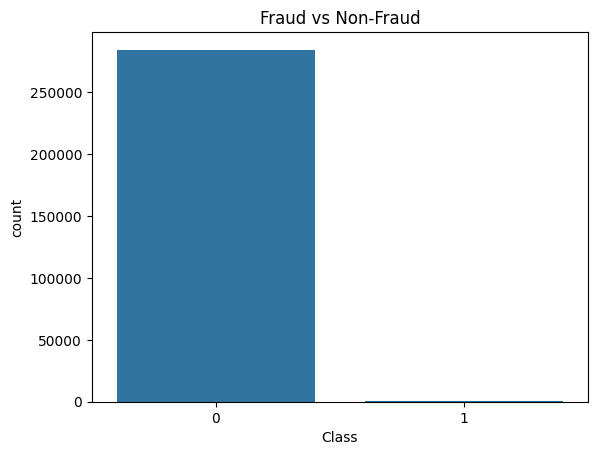

In [9]:
print(df['Class'].value_counts())

sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud')
plt.show()

2.2 Correlation **Heatmap**

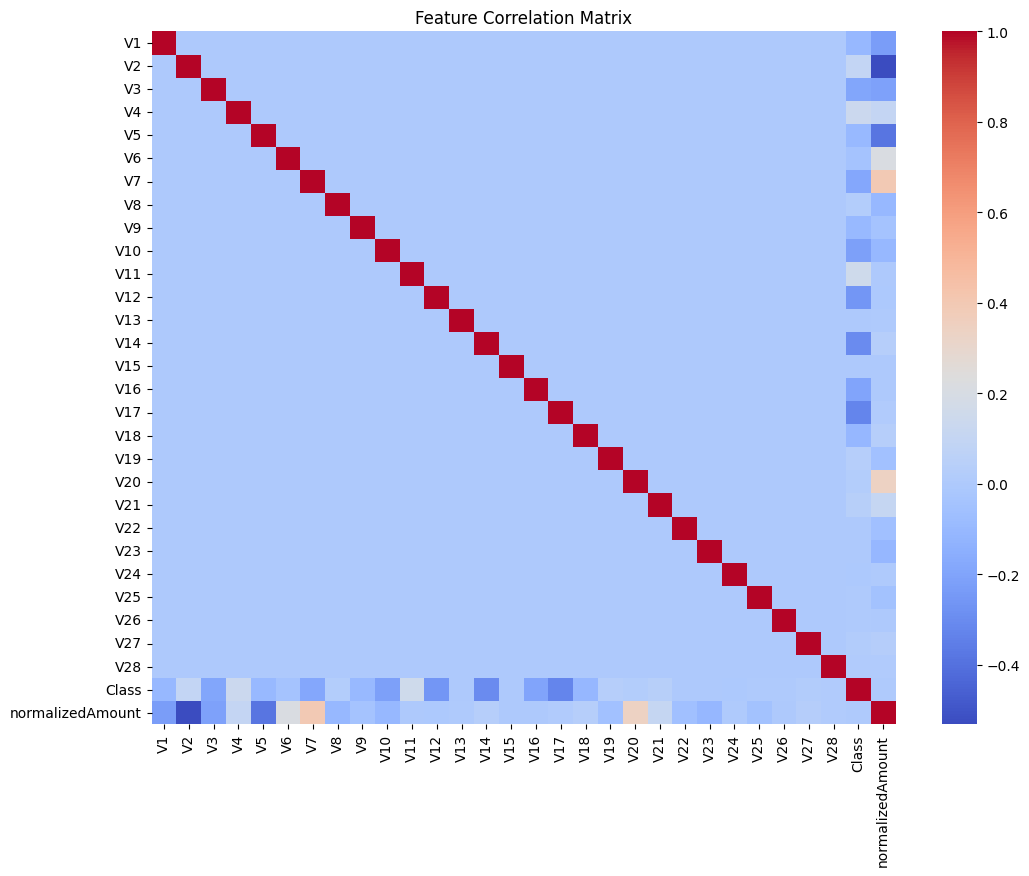

In [10]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


 Step 3: **Unsupervised Anomaly Detection**
**3.1** Isolation Forest

In [11]:
from sklearn.ensemble import IsolationForest

X = df.drop('Class', axis=1)
y = df['Class']

iso_forest = IsolationForest(n_estimators=100, contamination=0.001)
y_pred_if = iso_forest.fit_predict(X)

# Convert prediction (-1 = anomaly, 1 = normal)
y_pred_if = [1 if i == -1 else 0 for i in y_pred_if]

from sklearn.metrics import classification_report
print("Isolation Forest Performance:")
print(classification_report(y, y_pred_if))

Isolation Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.39      0.22      0.28       492

    accuracy                           1.00    284807
   macro avg       0.69      0.61      0.64    284807
weighted avg       1.00      1.00      1.00    284807



Step 4: **Supervised Classification**
4.1 Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

4.2 Random Forest Model

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)


Step 5: Evaluation

Accuracy: 0.9996488887328394
Precision: 0.9534883720930233
Recall: 0.8367346938775511
F1 Score: 0.8913043478260869


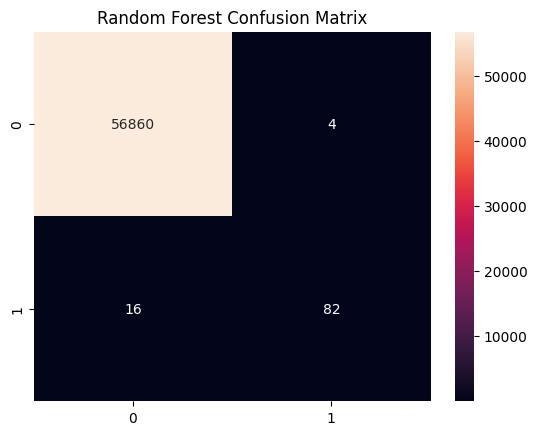

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


 Step 6: Visualization
6.1 Feature Importance

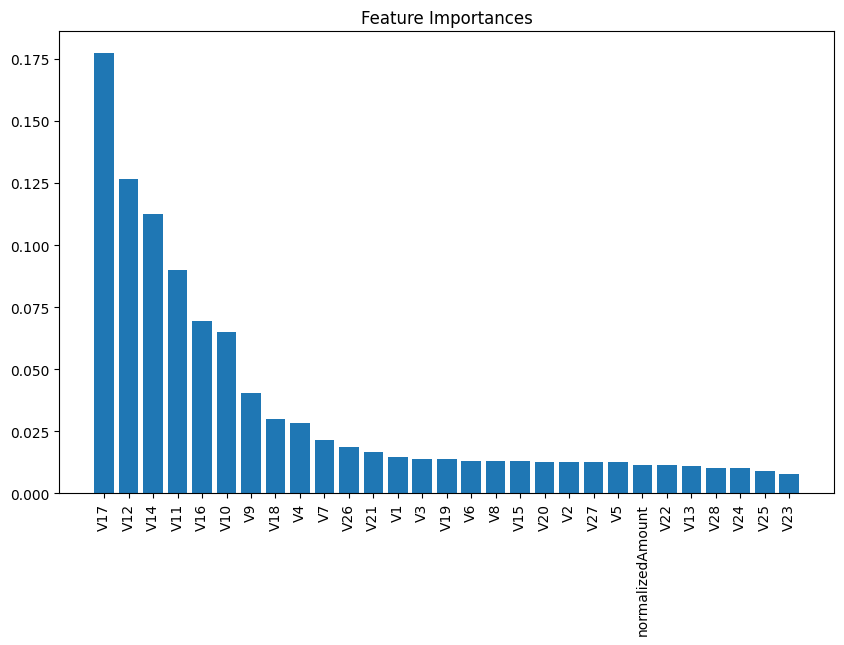

In [15]:
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()


Mount Google Drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
from google.colab import files
files.download('creditcard.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
!cp creditcard.csv /content/drive/MyDrive/fraud_project/

cp: cannot create regular file '/content/drive/MyDrive/fraud_project/': Not a directory


from google.colab import drive
drive.mount('/content/drive')